In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

exchange_rates = pd.read_csv('C:/Users/Ahmad/Desktop/Python/TwitterProjects/cbn_raw.csv', index_col=False)
# exchange_rates.reset_index()
exchange_rates.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,11/29/2022,US DOLLAR,2022,November,443.6700,444.1700,444.6700
1,11/29/2022,POUNDS STERLING,2022,November,533.4688,534.0700,534.6712
2,11/29/2022,EURO,2022,November,460.7513,461.2705,461.7898
3,11/29/2022,SWISS FRANC,2022,November,467.1686,467.6951,468.2215
4,11/29/2022,YEN,2022,November,3.2152,3.2189,3.2225


In [2]:
exchange_rates['Currency'].value_counts()

US DOLLAR             5127
WAUA                  5125
POUNDS STERLING       5122
EURO                  5119
YEN                   5118
CFA                   5097
RIYAL                 4587
SWISS FRANC           4173
SDR                   3590
YUAN/RENMINBI         2677
DANISH KRONA          2511
SOUTH AFRICAN RAND    1405
DANISH KRONER         1092
NAIRA                    8
POUND STERLING           5
YEN                      3
POESO                    3
CFA                      2
WAUA                     2
SDR                      2
JAPANESE YEN             1
US DOLLAR                1
EURO\t                   1
EURO                     1
RIYAL                    1
SWISS FRANC\t            1
SDR\t                    1
Name: Currency, dtype: int64

In [3]:
# Selecting NGN-Dollar rates only
cbn_raw = exchange_rates.query('Currency == "US DOLLAR"').reset_index(drop=True)
cbn_raw.head()

,Rate Date,Currency,Rate Year,Rate Month,Buying Rate,Central Rate,Selling Rate
0,11/29/2022,US DOLLAR,2022,November,443.67,444.17,444.67
1,11/28/2022,US DOLLAR,2022,November,443.53,444.03,444.53
2,11/25/2022,US DOLLAR,2022,November,443.37,443.87,444.37
3,11/24/2022,US DOLLAR,2022,November,443.24,443.74,444.24
4,11/23/2022,US DOLLAR,2022,November,442.93,443.43,443.93


In [4]:
# cleaning up the date column
date_cleaned = cbn_raw['Rate Date'].astype('string')
date_cleaned = cbn_raw['Rate Date'].str.replace('/', '-')
date_cleaned.head()

0    11-29-2022
1    11-28-2022
2    11-25-2022
3    11-24-2022
4    11-23-2022
Name: Rate Date, dtype: object

In [5]:
# setting the desired time format
cbn_date = pd.to_datetime(date_cleaned)
cbn_date = cbn_date.dt.strftime('%Y-%m-%d')
cbn_date = pd.to_datetime(date_cleaned) #we lost the dtype when we used dt.strftime()
cbn_date.head()

0   2022-11-29
1   2022-11-28
2   2022-11-25
3   2022-11-24
4   2022-11-23
Name: Rate Date, dtype: datetime64[ns]

In [6]:
central_rate = cbn_raw['Central Rate'].astype('float')
central_rate.head()

0    444.17
1    444.03
2    443.87
3    443.74
4    443.43
Name: Central Rate, dtype: float64

In [7]:
cbn_raw['Date'] = cbn_date
cbn_raw['Exchange Rate'] = central_rate
cbn_official_rate = cbn_raw[['Date', 'Exchange Rate']]
cbn_official_rate.describe()

,Exchange Rate
count,5127.000000
mean,205.325474
std,99.114906
min,66.090000
25%,132.250000
50%,155.230000
75%,305.250000
max,1376.800000


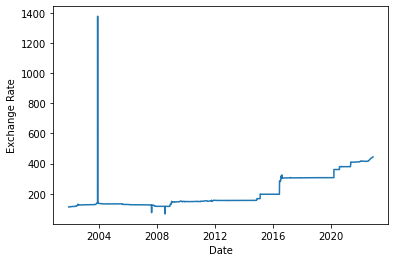

In [8]:
sns.lineplot(data=cbn_official_rate, x='Date', y='Exchange Rate')
plt.show()

In [13]:
# cleaning the outliers
outliers = cbn_official_rate[cbn_official_rate['Exchange Rate'] > 500]
official_rate = cbn_official_rate.drop(index=4637)
official_rate.describe()

,Exchange Rate
count,5126.000000
mean,205.096938
std,97.764273
min,66.090000
25%,132.250000
50%,155.230000
75%,305.250000
max,444.170000


In [10]:
cbn_rates2022 = official_rate.loc[official_rate['Date'].dt.year == 2022]
cbn_rates2022
# official_rate

,Date,Exchange Rate
0,2022-11-29,444.17
1,2022-11-28,444.03
2,2022-11-25,443.87
3,2022-11-24,443.74
4,2022-11-23,443.43
...,...,...
216,2022-01-10,413.76
217,2022-01-07,413.64
218,2022-01-06,413.46
219,2022-01-05,413.29


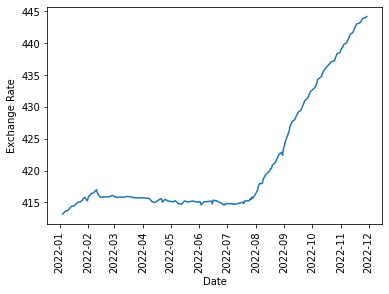

In [11]:
sns.lineplot(data=cbn_rates2022, x='Date', y='Exchange Rate')
plt.xticks(rotation=90)
plt.show()

In [12]:
# cbn_rates2022.to_csv('cbn_rates2022.csv')